In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')

print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


* Pregnancies: 임신 횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압(mm Hg)
* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* Insulin: 혈청 인슐린(mu U/ml)
* BMI: 체질량지수(체중(kg)/(키(m))^2)
* DiabetesPedigreeFunction: 당뇨 내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정 값(0또는 1)


In [3]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    #ROC-AUC
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, \
    F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [4]:
from sklearn.ensemble import RandomForestClassifier

X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state= 156, stratify=y)

# 로지스틱 회귀로 확습, 예측 및 평가 수행
clf_rf = RandomForestClassifier(max_depth=5, random_state=156)
clf_rf.fit(X_train, y_train)
pred = clf_rf.predict(X_test)

pred_proba = clf_rf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[88 12]
 [22 32]]
정확도: 0.7792, 정밀도: 0.7273, 재현율: 0.5926,     F1: 0.6531, AUC: 0.8446


In [5]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행 
    #정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
   
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()


### 0값이 있는 피처들에서 0값의 데이터 건수와 퍼센트 계산

In [6]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count() # 768

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(
    feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


### 0값을 평균값으로 대체

In [7]:
diabetes_data[zero_features].median()

Glucose          117.0
BloodPressure     72.0
SkinThickness     23.0
Insulin           30.5
BMI               32.0
dtype: float64

In [8]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0,diabetes_data[zero_features].median())

In [9]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 이상치 제거

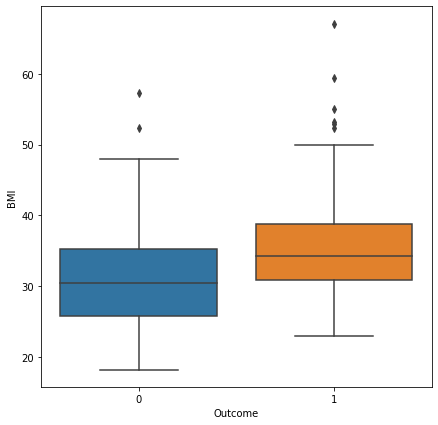

In [10]:
import seaborn as sns
# BMI 이상치 확인
fig = plt.figure(figsize=(7,7))
sns.boxplot(y='BMI', x='Outcome', data=diabetes_data)
plt.show()

In [11]:
# 3-sigma, 평균 ± 3 * 표준편차
# 평균 ± 3 * 표준편차 를 벗어나는 데이터는 이상치로 간주한다(정규분포 기반).
diabetes_clean = diabetes_data[np.abs(diabetes_data["BMI"] - diabetes_data["BMI"].mean()) <= (3*diabetes_data["BMI"].std())]

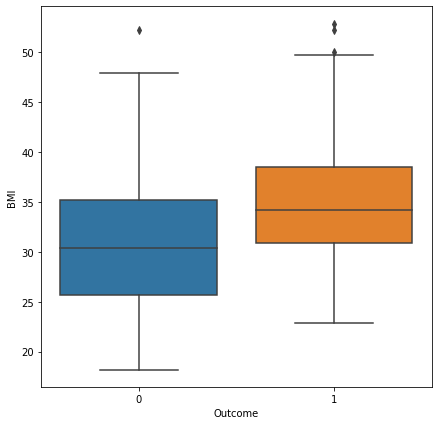

In [12]:
# BMI 이상치 재확인 -> 이상치 많이 줄어듦
fig = plt.figure(figsize=(7,7))
sns.boxplot(y='BMI', x= 'Outcome', data=diabetes_clean)
plt.show()

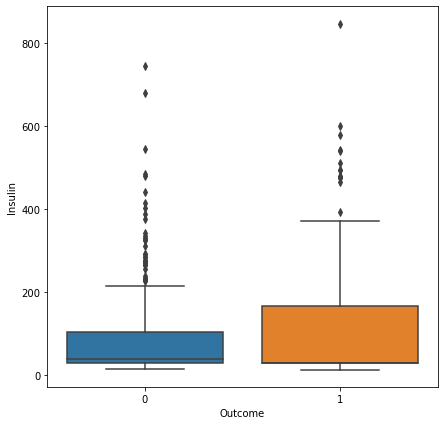

In [13]:
# Insulin 이상치 확인
fig = plt.figure(figsize=(7,7))
sns.boxplot(y='Insulin', x='Outcome', data=diabetes_data)
plt.show()

In [14]:
# 3-sigma, 평균 ± 3 * 표준편차
# 평균 ± 3 * 표준편차 를 벗어나는 데이터는 이상치로 간주한다(정규분포 기반).
diabetes_clean = diabetes_data[np.abs(diabetes_data["Insulin"] - diabetes_data["Insulin"].mean()) <= (3*diabetes_data["Insulin"].std())]

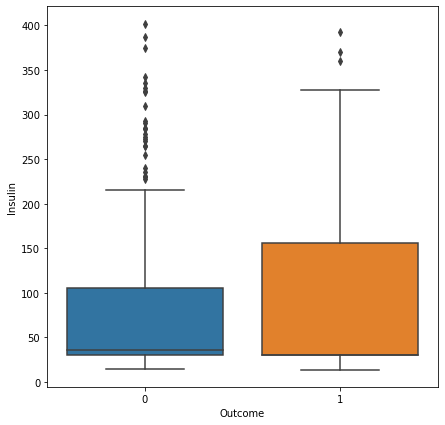

In [15]:
# Insulin 이상치 재확인 -> 이상치 많이 줄어듦
fig = plt.figure(figsize=(7,7))
sns.boxplot(y='Insulin', x='Outcome', data=diabetes_clean)
plt.show()

### standardscaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용하고 0값을 평균 값으로 대체한 데이터 세트로 학습/예측

In [16]:
X = diabetes_clean.iloc[:, :-1]
y = diabetes_clean.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2,
                                                    random_state = 156, stratify = y)

clf_rf = RandomForestClassifier(max_depth=5, random_state=156)
clf_rf.fit(X_train, y_train)
pred = clf_rf.predict(X_test)

pred_proba = clf_rf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, pred, pred_proba)

# 
# 정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741,     F1: 0.6392, AUC: 0.7919

오차 행렬
[[91  8]
 [21 30]]
정확도: 0.8067, 정밀도: 0.7895, 재현율: 0.5882,     F1: 0.6742, AUC: 0.8938


### 분류결정 임곗값을 변경하면서 성능 측정
**여러개의 분류 결정 임곗값을 변경하면서 Binarizer를 이용하여 예측값 변환**

In [17]:
from sklearn.preprocessing import Binarizer
X = [[1., -1., 2.],
    [2., 0., 0.],
    [0., 1., -1.]]

transformer = Binarizer(threshold=1.1)
print(transformer.transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 0.]]


In [18]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds 리스트 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [19]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = clf_rf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

임곗값: 0.3
오차 행렬
[[70 29]
 [ 5 46]]
정확도: 0.7733, 정밀도: 0.6133, 재현율: 0.9020,     F1: 0.7302, AUC: 0.8938
임곗값: 0.33
오차 행렬
[[77 22]
 [ 7 44]]
정확도: 0.8067, 정밀도: 0.6667, 재현율: 0.8627,     F1: 0.7521, AUC: 0.8938
임곗값: 0.36
오차 행렬
[[81 18]
 [ 7 44]]
정확도: 0.8333, 정밀도: 0.7097, 재현율: 0.8627,     F1: 0.7788, AUC: 0.8938
임곗값: 0.39
오차 행렬
[[83 16]
 [ 9 42]]
정확도: 0.8333, 정밀도: 0.7241, 재현율: 0.8235,     F1: 0.7706, AUC: 0.8938
임곗값: 0.42
오차 행렬
[[85 14]
 [15 36]]
정확도: 0.8067, 정밀도: 0.7200, 재현율: 0.7059,     F1: 0.7129, AUC: 0.8938
임곗값: 0.45
오차 행렬
[[89 10]
 [18 33]]
정확도: 0.8133, 정밀도: 0.7674, 재현율: 0.6471,     F1: 0.7021, AUC: 0.8938
임곗값: 0.48
오차 행렬
[[91  8]
 [19 32]]
정확도: 0.8200, 정밀도: 0.8000, 재현율: 0.6275,     F1: 0.7033, AUC: 0.8938
임곗값: 0.5
오차 행렬
[[91  8]
 [21 30]]
정확도: 0.8067, 정밀도: 0.7895, 재현율: 0.5882,     F1: 0.6742, AUC: 0.8938


In [23]:
# 임곗값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))
get_clf_eval(y_test , pred_th_048, pred_proba[:, 1])
# 기존: 정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,     F1: 0.6931, AUC: 0.8433

오차 행렬
[[91  8]
 [19 32]]
정확도: 0.8200, 정밀도: 0.8000, 재현율: 0.6275,     F1: 0.7033, AUC: 0.8938
